<a href="https://colab.research.google.com/github/sruthib22/data690_Sruthi/blob/main/Machine_Learning_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input

import matplotlib.pyplot as plt

In [8]:
import gzip
import json
import numpy as np
with gzip.open("/content/mnist_rowmajor.jsonl.gz") as f:
  data = [json.loads(line) for line in f]

In [2]:
import pandas as pd

df = pd.DataFrame(data)
df

,image,split,label
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",train,1
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",train,3
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",train,7
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",train,2
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",train,1
...,...,...,...
69995,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test,7
69996,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test,7
69997,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test,0
69998,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test,8


In [3]:
#seperating the training dataset and test dataset
df_train = df.query("split in(['train'])") # to retrieve the train dataset
df_train.head(10)

,image,split,label
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",train,1
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",train,3
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",train,7
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",train,2
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",train,1
5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",train,2
6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",train,6
7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",train,1
8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",train,7
9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",train,5


In [4]:
# to retrieve the test dataset 
df_test = df.query("split in(['test'])") # to retrieve the train dataset
df_test.head(10)

,image,split,label
60000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test,8
60001,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test,6
60002,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test,5
60003,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test,4
60004,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test,0
60005,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test,2
60006,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test,3
60007,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test,8
60008,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test,3
60009,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test,6


In [5]:
int_train = df_train.sample(frac=0.8, random_state=25)
int_dev = df_train.drop(int_train.index)

print(f"No. of training examples: {int_train.shape[0]}")
print(f"No. of testing examples: {int_dev.shape[0]}")

No. of training examples: 48000
No. of testing examples: 12000


In [6]:
training_size = len(int_train) #giving the size of int_train as derived above
testing_size = len(int_dev) 

In [10]:
train_images, train_labels = int_train['image'], int_train['label'] #loading the data 
test_images, test_labels = int_dev['image'], int_dev['label']

train_images = list(map(lambda x:x,  train_images[:training_size])) # converting the list to a normal set of numbers
train_labels = list(map(lambda x:x, train_labels[:training_size]))

test_images = list(map(lambda x:x, test_images[:training_size]))
test_labels = list(map(lambda x:x, test_labels[:training_size]))

train_images = np.array(train_images[:training_size]) # converting the set of numbers to an array using numpy
train_labels = np.array(train_labels[:training_size])

test_images = np.array(test_images[:testing_size])
test_labels = np.array(test_labels[:testing_size])

"""Rescaling Data"""
train_images = train_images / 255 #rescaling the data to one format by using normalization value i.e 255
test_images = test_images / 255

In [22]:
train_labels = train_labels/255
test_labels = test_labels/255

In [13]:
train_images.shape

(48000, 784)

In [16]:
test_images.shape[1]

784

In [23]:
train_labels.shape

(48000,)

In [17]:
input_layer = Input(shape = (train_images.shape[1]))
bottleneck = Dense(32, activation = 'relu', name = 'bottleneck')(input_layer)
output = Dense(train_images.shape[1], activation = 'sigmoid', name = 'output')(bottleneck)

In [18]:
autoencoder = Model(input_layer, output)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 bottleneck (Dense)          (None, 32)                25120     
                                                                 
 output (Dense)              (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [19]:
encoder = Model(input_layer, bottleneck)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 bottleneck (Dense)          (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [20]:
encoded_layer = Input(shape = (32,), name = 'encoded_layer')
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_layer, decoder_layer(encoded_layer))
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoded_layer (InputLayer)  [(None, 32)]              0         
                                                                 
 output (Dense)              (None, 784)               25872     
                                                                 
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [28]:
autoencoder.compile(loss = 'mse', optimizer = 'adam')
history = autoencoder.fit(train_images , train_labels, epochs=20, batch_size = 128)

Epoch 1/20
375/375 [==============================] - 3s 8ms/step - loss: 2.3078e-04
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: 1.5296e-04
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 1.3202e-04
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 1.1590e-04
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 1.0361e-04
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 9.4173e-05
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 8.7012e-05
Epoch 8/20
375/375 [==============================] - 2s 5ms/step - loss: 8.1485e-05
Epoch 9/20
375/375 [==============================] - 2s 5ms/step - loss: 7.7278e-05
Epoch 10/20
375/375 [==============================] - 2s 5ms/step - loss: 7.4069e-05
Epoch 11/20
375/375 [==============================] - 2s 5ms/step - loss: 7.1647e-05
Epoch 12/20
375/375 [==============================] - 2s 5ms/s

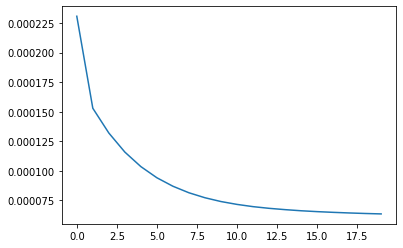

In [29]:
plt.plot(history.history['loss'])

In [31]:
encoded_data = encoder.predict(test_images, batch_size=512)
encoded_data.shape

(12000, 32)

In [32]:
output_data = decoder.predict(encoded_data, batch_size=512)
output_data.shape

(12000, 784)

In [33]:
output_data = output_data.reshape(output_data.shape[0], 28,28)
output_data.shape

(12000, 28, 28)

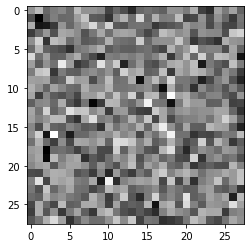

In [34]:
plt.imshow(output_data[0], cmap ='gray')

In [36]:
test_images = test_images.reshape(12000, 28,28)
test_images.shape

(12000, 28, 28)

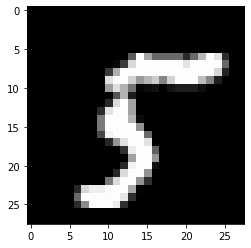

In [38]:
plt.imshow(test_images[0], cmap = 'gray')